# Machine Learning Project - Predicting Housing Price In Ames, Iowa

> We have the duty of **formulating**, of **summarizing**, and of **communicating our conclusions**, in intelligible form, in recognition of the right of other free minds to utilize them in making their own decisions.
>
> --_Ronald Fisher_

This Jupyter notebook incorporates exploratory data analysis, the process of dropping variables/columns, data imputation. The main objective is to get a general sense of the data, perform part of the feature engineering and data transformation.

<a id='top'></a>
## Table of Contents

* [1. Exploratory Data Analysis](#EDA)
 * [1.0 Dataframe Overview](#Overview)
 * [1.1 Missingness](#Missingness)
 * [1.2 Inbalances](#Inbalance)
 * [1.3 Correlation Check](#Correlation)
* [2. Exploring Variables](#Variable_Exploration)
 * [2.1 Take a look at SalePrice](#SalePrice)
* [3. Feature Engineering](#feature)




<a id='EDA'></a>

## 1. Exploratory Data Analysis

<a id='Overview'></a>

### 1.0 Dataframe Overview

In [400]:
# Import Data Analysis Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import power_transform
from scipy import stats
from  matplotlib.ticker import PercentFormatter

In [401]:
# Import Data
filePath  = './data/'
df_train = pd.read_csv(filePath + "train.csv")
df_test = pd.read_csv(filePath + "test.csv")

In [402]:
print(df_train.shape) # training dataframe contains 1460 observations with 81 variables, including SalePrice
print(df_test.shape)  # test dataframe contains 1459 observations with 80 variables

(1460, 81)
(1459, 80)


In [403]:
# df_train.head()

In [404]:
# df_test.head()

In [405]:
df_train.dtypes.value_counts() 
# Out of 81 variables, we have 43 categorical/qualitative variables, 38 quantitative variables
# test dataset has one less variable SalePrice

object     43
int64      35
float64     3
dtype: int64

In [406]:
# list of categorical variables
obj_list = list(df_train.columns[df_train.dtypes == 'object'])
print(obj_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [407]:
# list of quantitative variables Id/Saleprice would be need to be removed later 
num_list = list(df_train.columns[df_train.dtypes != 'object'])
num_list.remove('Id')
num_list.remove('SalePrice')
print(num_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [408]:
train_saleprice = df_train.SalePrice

In [409]:
train_id = df_train.Id
test_id = df_test.Id

In [410]:
# df_train[num_list].describe()

[Back To Top](#top)

<a id='Missingness'></a>
### 1.1 Missingness

In [411]:
# Overall Missingness training set
total_nan = df_train.isnull().sum().sum()
print("Total NaN in training Dataframe: " , total_nan)
print("Percent Missingness in Dataframe: ", 100*total_nan/(len(df_train.index)*len(df_train.columns)))
# Overall Missingness test set 
print('・ω・'*20)
total_nan = df_test.isnull().sum().sum()
print("Total NaN in testing Dataframe: " , total_nan)
print("Percent Missingness in Dataframe: ", 100*total_nan/(len(df_test.index)*len(df_test.columns)))
# There seems to be more missing data with the test data

Total NaN in training Dataframe:  6965
Percent Missingness in Dataframe:  5.889565364451209
・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・・ω・
Total NaN in testing Dataframe:  7000
Percent Missingness in Dataframe:  5.9972583961617545


In [412]:
# Missingness of categorical variables
obj_miss_percent_train = {}
for i in range(len(obj_list)):
#     print('-'*55)
#     print(df_train[obj_list[i]].value_counts())
    missing_value = df_train[obj_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    obj_miss_percent_train[obj_list[i]] = missing_percentage
#     print('Number of missing values in %s is %d'%(obj_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(obj_list[i], missing_percentage))

In [413]:
# Missingness of categorical variables
obj_miss_percent_test = {}
for i in range(len(obj_list)):
#     print('-'*55)
#     print(df_train[obj_list[i]].value_counts())
    missing_value = df_test[obj_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_test)
    obj_miss_percent_test[obj_list[i]] = missing_percentage
#     print('Number of missing values in %s is %d'%(obj_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(obj_list[i], missing_percentage))

In [414]:
# Missingness of numerical variables (training)
num_miss_percent_train = {}
for i in range(len(num_list)):
#     print('-'*55)
#     print(df_train[num_list[i]].value_counts())
    missing_value = df_train[num_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    num_miss_percent_train[num_list[i]] =  missing_percentage
#     print('Number of missing values in %s is %d'%(num_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(num_list[i], missing_percentage))

In [415]:
# Missingness of numerical variables (testing)
num_miss_percent_test = {}
for i in range(len(num_list)):
#     print('-'*55)
#     print(df_train[num_list[i]].value_counts())
    missing_value = df_test[num_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_test)
    num_miss_percent_test[num_list[i]] =  missing_percentage
#     print('Number of missing values in %s is %d'%(num_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(num_list[i], missing_percentage))

In [416]:
perc_missing_train = {**obj_miss_percent_train, **num_miss_percent_train}
perc_missing_train = pd.DataFrame(perc_missing_train.items(), columns=['Variable', 'Missingness'])
perc_missing_train = perc_missing_train[perc_missing_train.Missingness > 0]
perc_missing_train.sort_values('Missingness', ascending = False, inplace = True)

In [417]:
perc_missing_test = {**obj_miss_percent_test, **num_miss_percent_test}
perc_missing_test = pd.DataFrame(perc_missing_test.items(), columns=['Variable', 'Missingness'])
perc_missing_test = perc_missing_test[perc_missing_test.Missingness > 0]
perc_missing_test.sort_values('Missingness', ascending = False, inplace = True)

In [418]:
# for those variables with missing values, we print the value counts

# for i in range(len(perc_missing)):
#     print(perc_missing.index[i])
#     print('-'*15)
#     print(df_train[perc_missing.index[i]].value_counts())
#     print('-'*55)

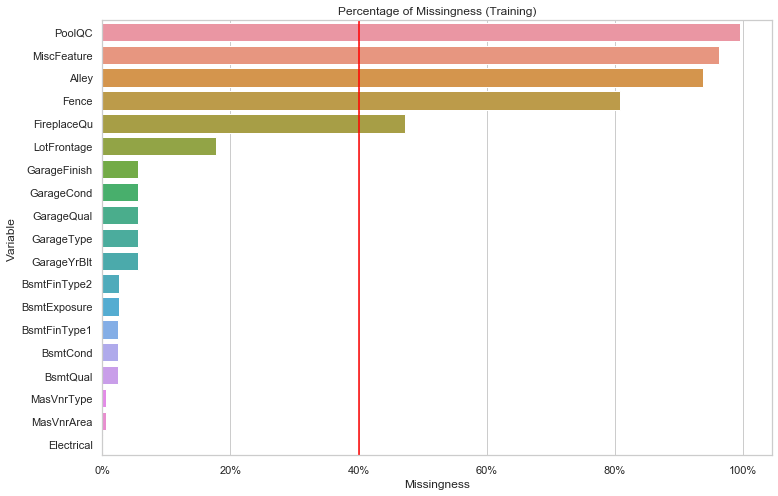

In [419]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
perc_bar = sns.barplot(y = 'Variable', x = 'Missingness', data = perc_missing_train, ax = ax)
perc_bar.set(title = 'Percentage of Missingness (Training)')
plt.axvline(x = 0.4, color='red')

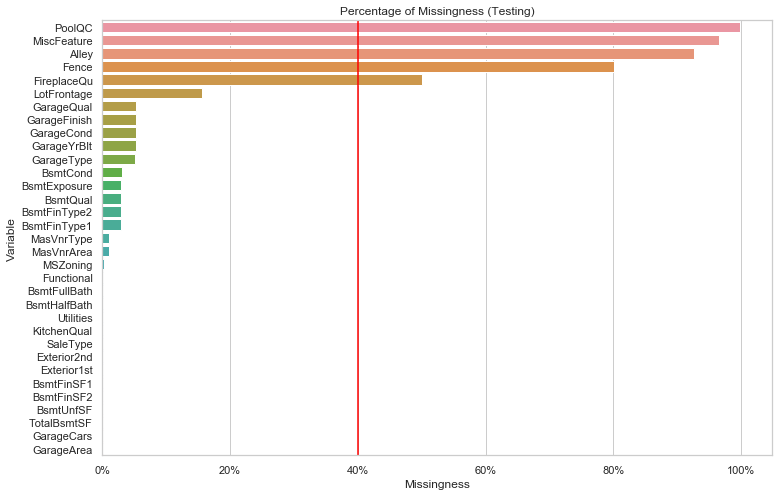

In [420]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_formatter(PercentFormatter(1))
perc_bar = sns.barplot(y = 'Variable', x = 'Missingness', data = perc_missing_test, ax = ax)
perc_bar.set(title = 'Percentage of Missingness (Testing)')
plt.axvline(x = 0.4, color='red')

In [421]:
# Number of missing variables for training set
print('Number of variables having missing values is ' + str(len(perc_missing_train)))

Number of variables having missing values is 19


In [422]:
# Number of missing variables for testing set
print('Number of variables having missing values is ' + str(len(perc_missing_test)))

Number of variables having missing values is 33


By looking at the barplot above, we decided to first drop the columns with greater than 40% missingness, the dropped columns are as follows. NAs mostly mean that the corresponding house doesn't have certain things, pools, fences for example. We may add those variables back for predicting those houses with higher values.

In [423]:
dropped_columns_train = perc_missing_train[perc_missing_train.Missingness > 0.4].Variable.values
dropped_columns_test = perc_missing_test[perc_missing_test.Missingness > 0.4].Variable.values
dropped_columns = set(dropped_columns_train + dropped_columns_test)
dropped_columns

{'AlleyAlley',
 'FenceFence',
 'FireplaceQuFireplaceQu',
 'MiscFeatureMiscFeature',
 'PoolQCPoolQC'}

Other check for missingness, the following function checks None, negatives or empty strings

In [424]:
def data_eval(df):
    for i in range(len(df.columns)):
        print('-'*50)
        print('Column Name: ', df.columns[i])
        if (df[df.columns[i]].dtypes == 'float64' or df[df.columns[i]].dtypes == 'int64') and \
        df[df.columns[i]][df[df.columns[i]]<0].count()>0:
            print('Number of negatives: ', df[df.columns[i]][df[df.columns[i]]<0].count())
        if df[df.columns[i]][df[df.columns[i]]=='None'].count() > 0:
            print('Number of None strings: ', df[df.columns[i]][df[df.columns[i]]=='None'].count())
        if df[df.columns[i]][df[df.columns[i]]==''].count() > 0:
            print('Number of empty strings: ', df[df.columns[i]][df[df.columns[i]]==''].count())
        else:
            print('Column ' + df.columns[i] + ' has no negatives, empty strings or Nones')

In [425]:
# data_eval(df_train) # It turns out that the dataframe is quite clean, with none of those

In [426]:
# helper function to obtain the number of missing values for each row
def row_na_list(df, value):
    l=[]
    for i in range(len(df.index)) :
        if df.iloc[i].isnull().sum() > value:
            l.append([i, df.iloc[i].isnull().sum()])
    return l

# value=10
# row_na = row_na_list(df_train,value)
# print('Number of Rows with missingness greater than ' + str(value) + ': ' + str(len(row_na)))
# print('Minimum percentage missingness: ', 100*(value+1)/len(df_train.columns))
# for i in range(len(row_na)):
#     print('-'*50)
#     print('Row ' + str(row_na[i][0]) + ' with ' +str(100*row_na[i][1]/len(df_train.columns)) 
#           + ' percent missingness')
#     print('Number of missing entries in row: ', row_na[i][1])

[Back To Top](#top)

<a id='Inbalance'></a>
### 1.2 Inbalances

We noticed that for some variables, if we do a value count, one single value accounts for more than 80% of all the values, we decided to remove those variables for now as they don't add much information to the regression. In the later stage of the project, we will consider them case by case if we need to add them back to the model.

In [427]:
def inbalance_check(df, value):
    inbalance_columns = []
    for i in range(df.shape[1]):
        if df[df.columns[i]].value_counts(normalize = True).values[0] > value:
            inbalance_columns.append(df.columns[i])
    return inbalance_columns

In [428]:
inbalance_columns = inbalance_check(df_train, 0.8)
print(inbalance_columns)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']


[Back To Top](#top)

<a id='Correlation'></a>

### 1.3 Correlation Check

In [429]:
# Output a big correlation table

# df_train.corr()

In [430]:
# helper function searching for high correlation paris
def index_retrieve(df, value, measure):
    ''' Get index positions of value in dataframe.'''

    poslist = list()
    # Get bool dataframe with True at positions where the given value exists and filter out on-diagonal elements
    if measure == 'spearman':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    elif measure == 'pearson':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    # Get list of columns that contains the value
    series = result.any()
    columnNames = list(series[series == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            poslist.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    
    if value > 0:
        print('Number of correlations with value greater than ' + str(value) + ': ' + str(len(poslist)))
    if value < 0:
        print('Number of correlations with value less than ' + str(value) + ': ' + str(len(poslist)))
    else:
        pass
    for i in range(len(poslist)):
        print('-'*40)
        print('index labels: ', poslist[i][0], poslist[i][1])
        print('value at index: ', df.corr().loc[poslist[i]])
    
    return poslist

In [431]:
sig_cor_index_list = index_retrieve(df_train, 0.7, 'spearman')

Number of correlations with value greater than 0.7: 14
----------------------------------------
index labels:  SalePrice OverallQual
value at index:  0.7909816005838047
----------------------------------------
index labels:  GarageYrBlt YearBuilt
value at index:  0.8256674841743434
----------------------------------------
index labels:  GarageYrBlt YearRemodAdd
value at index:  0.6422767797035414
----------------------------------------
index labels:  1stFlrSF TotalBsmtSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotalBsmtSF 1stFlrSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotRmsAbvGrd GrLivArea
value at index:  0.8254893743088377
----------------------------------------
index labels:  SalePrice GrLivArea
value at index:  0.7086244776126511
----------------------------------------
index labels:  GrLivArea TotRmsAbvGrd
value at index:  0.8254893743088377
--------------------------------

In [432]:
# spearman
print('top 10 Spearman correlation coefficient')
print(df_train.corr(method='spearman').SalePrice.sort_values(ascending=False).head(10))
print('-'*55)
# pearson
print('top 10 Pearson correlation coefficient')
print(df_train.corr().SalePrice.sort_values(ascending=False).head(10))

top 10 Spearman correlation coefficient
SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64
-------------------------------------------------------
top 10 Pearson correlation coefficient
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


[Back To Top](#top)

<a id='Variable_Exploration'></a>

## 2. Variable Exploration

<a id='SalePrice'></a>

### 2.1 SalePrice

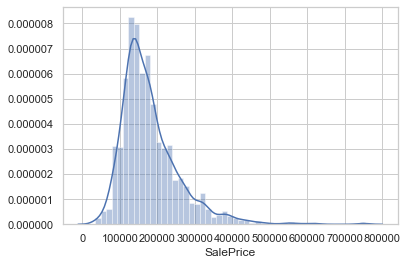

In [433]:
sns.set(style="whitegrid")
sns.distplot(df_train.SalePrice)

We can see that the distribution of the sale price is right skewed, we perform the log transformation and the plot is as follows.

In [229]:
df_train.SalePrice = np.log1p(df_train.SalePrice)

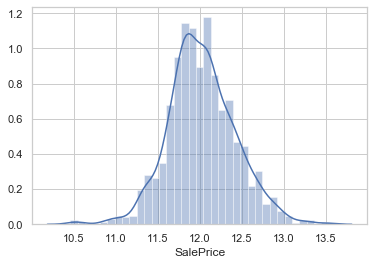

In [230]:
sns.distplot(df_train.SalePrice)

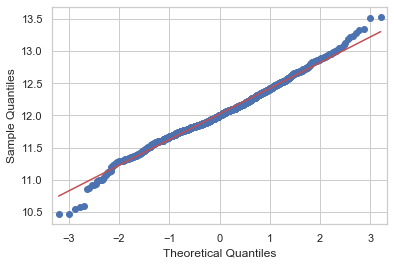

In [231]:
qqplot(df_train.SalePrice, line = 's')
plt.show()

### 2.2 Skewness and Kurtosis Check of Other Variables

In [232]:
from scipy.stats import kurtosis

In [233]:
abs(df_train.skew()) > 1

Id               False
MSSubClass        True
LotFrontage       True
LotArea           True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF      True
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr      True
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF        True
OpenPorchSF       True
EnclosedPorch     True
3SsnPorch         True
ScreenPorch       True
PoolArea          True
MiscVal           True
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [234]:
from scipy import special

In [235]:
skewed_list = list(np.array(num_list)[(abs(df_train.skew()) > 1)[1:]])
for skew in skewed_list:
    print(skew)
    print(np.log1p(df_train[skew]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 37

In [236]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,

In [237]:
df_train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

## 3. Data Imputation

In [434]:
print(perc_missing_train.Variable.values)

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageFinish' 'GarageCond' 'GarageQual' 'GarageType' 'GarageYrBlt'
 'BsmtFinType2' 'BsmtExposure' 'BsmtFinType1' 'BsmtCond' 'BsmtQual'
 'MasVnrType' 'MasVnrArea' 'Electrical']


In [435]:
print(perc_missing_test.Variable.values)

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageQual' 'GarageFinish' 'GarageCond' 'GarageYrBlt' 'GarageType'
 'BsmtCond' 'BsmtExposure' 'BsmtQual' 'BsmtFinType2' 'BsmtFinType1'
 'MasVnrType' 'MasVnrArea' 'MSZoning' 'Functional' 'BsmtFullBath'
 'BsmtHalfBath' 'Utilities' 'KitchenQual' 'SaleType' 'Exterior2nd'
 'Exterior1st' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'GarageCars' 'GarageArea']


In [436]:
col_to_impute = list(set(list(perc_missing_train.Variable.values) + list(perc_missing_test.Variable.values)))

### 3.1 Pools

We will first look at pools, where pool-related variables have the highest missing percentage. There are two pool variables, pool area (numerical) and pool QC (categorical). Since NA for poolQC means no pools. We fill it with None. Also, this variable seems to be ordinal, we would assign numerical value to it.

In [437]:
df_train.PoolQC.fillna('None', inplace = True)
df_test.PoolQC.fillna('None', inplace = True)

In [438]:
df_train['PoolQC'] = df_train['PoolQC'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'None': 0})
df_test['PoolQC'] = df_test['PoolQC'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'None': 0})

We also want to see if there is any observation with pool area greater than 0 and with poolQC equal to 0 (i.e. None), we will then fix it.

In [439]:
df_train[(df_train.PoolQC == 0) & (df_train.PoolArea > 0)] # None for the training data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [440]:
df_test[(df_test.PoolQC == 0) & (df_test.PoolArea > 0)] 
# Three for the test data, and we will fix it according to the overall quality of the house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,0,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,0,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NaN,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,0,GdPrv,NaN,0,6,2007,WD,Normal


In [441]:
df_test.PoolQC.iloc[[960, 1043, 1139]] = [60, 70, 60] #Overall Quality goes from 0 to 10 assign accordingly

In [442]:
col_to_impute.remove('PoolQC')

### 3.2 Miscellaneous, Alley, Fence

In [443]:
df_train.MiscFeature.fillna('None', inplace = True)
df_test.MiscFeature.fillna('None', inplace = True)
# just fill it with None # Need a plot with average saleprice for each feature and the number of observations

For alley, it is quite similar, NA means None.

In [444]:
df_train.Alley.fillna('None', inplace = True)
df_test.Alley.fillna('None', inplace = True)
df_train.Fence.fillna('None', inplace = True)
df_test.Fence.fillna('None', inplace = True)

In [445]:
col_to_impute.remove('MiscFeature')
col_to_impute.remove('Alley')
col_to_impute.remove('Fence')

### 3.3 Fireplaces 

Pretty similar to pools, there are 2 fireplace variables. We convert it in the similar fashion

In [446]:
df_train.FireplaceQu.fillna('None', inplace = True)
df_test.FireplaceQu.fillna('None', inplace = True)

In [447]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
# Also, there are no missing values for the fireplace variables

In [448]:
col_to_impute.remove('FireplaceQu')

### 3.3 Garages

We will look into variables that associate with garage in this section. We replace missing garage built year with the building built year. As there is no information indicating whether garage is added during the remodeling, so we assume that the garage building year is the same as the building year of the house. If the house doesn't have a garage, then this variable would be irrelevant, so this imputation makes sense in this way.

In [449]:
garage_missing = ['GarageFinish', 'GarageCars', 'GarageCond', 'GarageArea', 'GarageQual', 'GarageType', 'GarageYrBlt']

In [450]:
df_train[garage_missing].isnull().sum()

GarageFinish    81
GarageCars       0
GarageCond      81
GarageArea       0
GarageQual      81
GarageType      81
GarageYrBlt     81
dtype: int64

In [451]:
df_test[garage_missing].isnull().sum()

GarageFinish    78
GarageCars       1
GarageCond      78
GarageArea       1
GarageQual      78
GarageType      76
GarageYrBlt     78
dtype: int64

In [452]:
df_train.GarageYrBlt.loc[df_train.GarageYrBlt.isnull()] = df_train.YearBuilt.loc[df_train.GarageYrBlt.isnull()]
df_test.GarageYrBlt.loc[df_test.GarageYrBlt.isnull()] = df_test.YearBuilt.loc[df_test.GarageYrBlt.isnull()]

Let's now take a look on how to impute GarageFinish, GarageCond, GarageQual and GarageType. For these four variables, NA simply means no garage.

In [453]:
print(len(df_train[(df_train.GarageFinish.isnull()) & (df_train.GarageCond.isnull()) & (df_train.GarageQual.isnull()) 
                   & (df_train.GarageType.isnull())]))  # all these four NAs are together in the training set
print(len(df_test[(df_test.GarageFinish.isnull()) & (df_test.GarageCond.isnull()) & (df_test.GarageQual.isnull()) &
        (df_test.GarageType.isnull())]))  # 76 of them are together, let's now find the 2 peculiar ones

81
76


In [454]:
df_test[(df_test.GarageFinish.isnull()) & (df_test.GarageCond.isnull()) & (df_test.GarageQual.isnull()) &
        (~df_test.GarageType.isnull())][garage_missing] # 666 seem to have a garage while 1116 doesn't

,GarageFinish,GarageCars,GarageCond,GarageArea,GarageQual,GarageType,GarageYrBlt
666,NaN,1.0,NaN,360.0,NaN,Detchd,1910.0
1116,NaN,NaN,NaN,NaN,NaN,Detchd,1923.0


In [455]:
df_test[garage_missing].mode()

,GarageFinish,GarageCars,GarageCond,GarageArea,GarageQual,GarageType,GarageYrBlt
0,Unf,2.0,TA,0.0,TA,Attchd,2005.0


In [456]:
# impute with mode
df_test.GarageFinish.iloc[666] = 'Unf'
df_test.GarageCond.iloc[666] = 'TA'
df_test.GarageQual.iloc[666] = 'TA'

In [457]:
# The missing GarageCars and GarageArea are due to 1116
df_test.GarageCars.iloc[1116] = 0
df_test.GarageArea.iloc[1116] = 0
df_test.GarageType.iloc[1116] = np.NaN

In [458]:
# Let's now impute GarageFinish, GarageCond, GarageQual, GarageType as usual

In [459]:
df_train.GarageFinish.fillna('None', inplace = True)
df_train.GarageCond.fillna('None', inplace = True)
df_train.GarageQual.fillna('None', inplace = True)
df_train.GarageType.fillna('None', inplace = True)
df_test.GarageFinish.fillna('None', inplace = True)
df_test.GarageCond.fillna('None', inplace = True)
df_test.GarageQual.fillna('None', inplace = True)
df_test.GarageType.fillna('None', inplace = True)

In [460]:
df_train['GarageFinish'] = df_train['GarageFinish'].map(
    {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
df_test['GarageFinish'] = df_test['GarageFinish'].map(
    {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
df_train['GarageCond'] = df_train['GarageCond'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['GarageCond'] = df_test['GarageCond'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_train['GarageQual'] = df_train['GarageQual'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})
df_test['GarageQual'] = df_test['GarageQual'].map({'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po':30, 'None': 0})

In [461]:
for _ in garage_missing:
    col_to_impute.remove(_)

### 3.4 Lot 

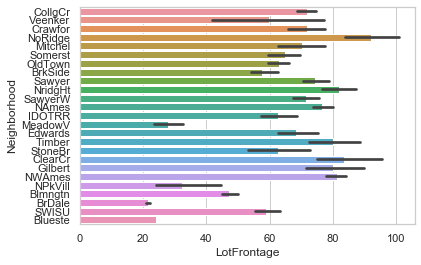

In [462]:
sns.barplot(y = 'Neighborhood', x = 'LotFrontage', data = df_train[~df_train.LotFrontage.isnull()])
# We can see that for each neighborhood, lotfrontage does have a difference, so we will impute according to the median
# of each neighborhood

In [463]:
neighbor_lot_dict = df_train.groupby('Neighborhood')['LotFrontage'].median().to_dict()

In [464]:
df_train.LotFrontage[df_train.LotFrontage.isnull()] = \
df_train.Neighborhood[df_train.LotFrontage.isnull()].map(neighbor_lot_dict)
df_test.LotFrontage[df_test.LotFrontage.isnull()] = \
df_test.Neighborhood[df_test.LotFrontage.isnull()].map(neighbor_lot_dict)

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [467]:
col_to_impute.remove('LotFrontage')

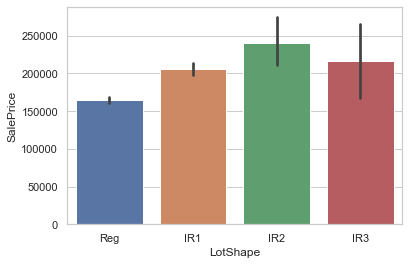

In [466]:
sns.barplot(y = 'SalePrice', x = 'LotShape', data = df_train) 
# there doesn't seem to have a pattern same with LotConfig

In [526]:
# According to the description, lotshape seems ordinal, we then map it
df_train['LotShape'] = df_train['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})
df_test['LotShape'] = df_test['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})

### 3.5 Basement Variables

In [471]:
basement_missing = ['BsmtHalfBath','BsmtQual','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtCond','BsmtFinType2','BsmtFullBath'] 
# There are 8 of them add 3 at the end (forgot ones ,hahaha)

In [525]:
# df_train[basement_missing].isnull().sum()

In [538]:
# df_test[basement_missing].isnull().sum()

BsmtHalfBath    0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtCond        0
BsmtFinType2    0
BsmtFullBath    0
dtype: int64

In [480]:
len(df_train[df_train.BsmtQual.isnull() & df_train.BsmtExposure.isnull() & df_train.BsmtFinType1.isnull()
        & df_train.BsmtFinType2.isnull() & df_train.BsmtCond.isnull()]) # They all appear in the 37 observations

37

In [500]:
df_train[(~df_train.BsmtQual.isnull()) & (df_train.BsmtExposure.isnull()|df_train.BsmtFinType2.isnull()) 
         & (~df_train.BsmtFinType1.isnull()) & (~df_train.BsmtCond.isnull())][basement_missing]
# One missing in exposure

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
332,0,Gd,No,GLQ,1124,TA,NaN,1
948,0,Gd,NaN,Unf,0,TA,Unf,0


In [499]:
len(df_test[df_test.BsmtQual.isnull() & df_test.BsmtExposure.isnull() & df_test.BsmtFinType1.isnull()
        & df_test.BsmtFinType2.isnull() & df_test.BsmtCond.isnull() & df_test.BsmtHalfBath.isnull()
            & df_test.BsmtFullBath.isnull() & df_test.BsmtFinSF1.isnull()])
# After playing around, we can see that these missing variables are all contained in 45 observations

1

In [503]:
df_test[(~df_test.BsmtFinType1.isnull()) & 
        (df_test.BsmtQual.isnull() | df_test.BsmtExposure.isnull() | df_test.BsmtCond.isnull() 
         | df_test.BsmtHalfBath.isnull() | df_test.BsmtFullBath.isnull() 
         | df_test.BsmtFinSF1.isnull())][basement_missing] # A table of part of the missing values

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
27,0.0,Gd,NaN,Unf,0.0,TA,Unf,0.0
580,0.0,Gd,Mn,GLQ,1044.0,NaN,Rec,1.0
725,1.0,TA,No,BLQ,1033.0,NaN,Unf,0.0
757,0.0,NaN,No,Unf,0.0,Fa,Unf,0.0
758,0.0,NaN,No,Unf,0.0,TA,Unf,0.0
888,0.0,Gd,NaN,Unf,0.0,TA,Unf,0.0
1064,0.0,TA,Av,ALQ,755.0,NaN,Unf,0.0


In [517]:
# We impute with the mode
df_train[basement_missing].mode()

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
0,0,TA,No,Unf,0,TA,Unf,0


In [518]:
df_test[basement_missing].mode()

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath
0,0.0,TA,No,GLQ,0.0,TA,Unf,0.0


In [509]:
df_train.BsmtFinType2.iloc[332] = 'Unf'
df_train.BsmtExposure.iloc[948] = 'No'
df_test.BsmtQual.iloc[[757,758]] = 'TA'
df_test.BsmtExposure.iloc[[27,888]] = 'No'
df_test.BsmtCond.iloc[[580,725,1064]] = 'TA'

In [519]:
df_train.BsmtFinType2.fillna('None', inplace = True)
df_train.BsmtExposure.fillna('None', inplace = True)
df_train.BsmtFinType1.fillna('None', inplace = True)
df_train.BsmtCond.fillna('None', inplace = True)
df_train.BsmtQual.fillna('None', inplace = True)
df_test.BsmtFinType2.fillna('None', inplace = True)
df_test.BsmtExposure.fillna('None', inplace = True)
df_test.BsmtFinType1.fillna('None', inplace = True)
df_test.BsmtCond.fillna('None', inplace = True)
df_test.BsmtQual.fillna('None', inplace = True)

In [522]:
# These five variables are ordinal, we map it to some value
df_train['BsmtQual'] = df_train['BsmtQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['BsmtQual'] = df_test['BsmtQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'None': 0, 'No' : 1, 'Mn' : 3, 'Av' : 4, 'Gd' : 5})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'None': 0, 'No' : 1, 'Mn' : 3, 'Av' : 4, 'Gd' : 5})
df_train['BsmtCond'] = df_train['BsmtCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 
                                                         'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [531]:
# There are still some remaining NAs, we fill them now.
df_test[df_test.BsmtHalfBath.isnull() | df_test.BsmtFinSF1.isnull() | 
        df_test.BsmtFullBath.isnull()][basement_missing]
# It is apparent that for those two houses, there are no basement, we change it to zero

,BsmtHalfBath,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtCond,BsmtFinType2,BsmtFullBath


In [602]:
df_test.BsmtHalfBath.iloc[[660,728]] = 0
df_test.BsmtFullBath.iloc[[660,728]] = 0
df_test.BsmtFinSF1.iloc[[660]] = 0
df_test.BsmtUnfSF.iloc[[660]] = 0
df_test.BsmtFinSF2.iloc[[660]] = 0
df_test.TotalBsmtSF.iloc[[660]] = 0

In [533]:
for _ in basement_missing:
    col_to_impute.remove(_)

In [600]:
basement_missing2 = ['BsmtUnfSF', 'BsmtFinSF2','TotalBsmtSF']

In [601]:
df_test[df_test.BsmtUnfSF.isnull() | df_test.BsmtFinSF2.isnull() |
       df_test.TotalBsmtSF.isnull()][basement_missing2]

,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF
660,0.0,NaN,0.0


In [558]:
for _ in basement_missing2:
    col_to_impute.remove(_)

### 3.6 Exteriors 

We are going to impute 'Exterior1st' and 'Exterior2nd'.

In [541]:
# df_train[df_train.Exterior1st.isnull()|df_train.Exterior2nd.isnull()] # None for the training set

In [547]:
df_test[df_test.Exterior1st.isnull()|df_test.Exterior2nd.isnull()][['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd


In [544]:
df_test[['Exterior1st', 'Exterior2nd']].mode() 

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd


In [546]:
# We impute with mode
df_test.Exterior1st.iloc[691] = 'VinylSd'
df_test.Exterior2nd.iloc[691] = 'VinylSd'

In [548]:
# ExterQual are ordinal, we encode it
df_train['ExterQual'] = df_train['ExterQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['ExterQual'] = df_test['ExterQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_train['ExterCond'] = df_train['ExterCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})
df_test['ExterCond'] = df_test['ExterCond'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50, 'None': 0})

In [549]:
col_to_impute.remove('Exterior1st')
col_to_impute.remove('Exterior2nd')

### 3.7 Masonry Veneer

In [562]:
mas_missing = ['MasVnrType', 'MasVnrArea']
print(df_train.isnull().sum()[mas_missing])
print(df_test.isnull().sum()[mas_missing])

MasVnrType    8
MasVnrArea    8
dtype: int64
MasVnrType    16
MasVnrArea    15
dtype: int64


In [566]:
#print(len(df_train[df_train.MasVnrType.isnull() & df_train.MasVnrArea.isnull()]))
#len(df_test[df_test.MasVnrType.isnull() & df_test.MasVnrArea.isnull()]) # All the missing values are together

In [572]:
df_test[df_test.MasVnrType.isnull() & ~df_test.MasVnrArea.isnull()][mas_missing]

,MasVnrType,MasVnrArea


In [573]:
df_test.MasVnrType.iloc[1150] = 'BrkFace' # impute with mode

In [577]:
# Since there is no mansory, so impute it with zero
df_train.MasVnrArea[df_train.MasVnrArea.isnull()] = 0
df_test.MasVnrArea[df_test.MasVnrArea.isnull()] = 0

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [579]:
df_train.MasVnrType.fillna('None', inplace = True)
df_test.MasVnrType.fillna('None', inplace = True)

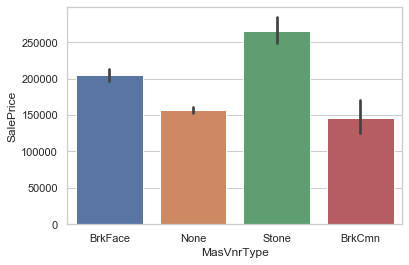

In [580]:
sns.barplot(x = 'MasVnrType', y = 'SalePrice', data = df_train) # This seems to be ordinal

In [581]:
df_train['MasVnrType'] = df_train['MasVnrType'].map({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2})
df_test['MasVnrType'] = df_test['MasVnrType'].map({'None' : 0, 'BrkCmn' : 0, 'BrkFace' : 1, 'Stone' : 2})

In [582]:
for _ in mas_missing:
    col_to_impute.remove(_)

### 3.8 MS Zoning

In [589]:
# df_train[df_train.MSZoning.isnull()] no for df_train
df_test[df_test.MSZoning.isnull()]['MSZoning'] # impute with mode

455     NaN
756     NaN
790     NaN
1444    NaN
Name: MSZoning, dtype: object

In [591]:
df_test.MSZoning.fillna('RL', inplace = True)

In [593]:
col_to_impute.remove('MSZoning')

### 3.9 Remaining Ones

In [605]:
remain_missing = col_to_impute.copy()

In [608]:
# df_train[remain_missing].isnull().sum() # One for electrical
# df_test[remain_missing].isnull().sum() # Functional, SaleType, KitchenQual, Utilities 2112

In [609]:
df_test.KitchenQual.fillna('TA', inplace = True)
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'Ex': 100, 'Gd': 90, 'TA': 80, 'Fa': 70, 'Po':50})

In [629]:
#df_train.Utilities.value_counts()
#df_test.Utilities.value_counts() 
#Nearly all variables have AllPub for utilities, which this variable is useless. # We simply drop this column

In [617]:
df_train.drop('Utilities', axis = 1, inplace = True)
df_test.drop('Utilities', axis = 1, inplace = True)

In [628]:
# Home functinality
df_train['Functional'].isnull().sum()
df_test['Functional'].isnull().sum() # 0 for training 2 NA for test
df_test['Functional'].fillna('Typ', inplace = True) # Also, this variable seems to be ordinal

In [621]:
df_train['Functional'] = df_train['Functional'].map({'Sal':0, 'Sev':2, 
                                                     'Maj2':3, 'Maj1':5, 'Mod':6, 'Min2':8, 'Min1':9, 'Typ':10})
df_test['Functional'] = df_test['Functional'].map({'Sal':0, 'Sev':2, 
                                                     'Maj2':3, 'Maj1':5, 'Mod':6, 'Min2':8, 'Min1':9, 'Typ':10})

In [627]:
df_train['Electrical'].isnull().sum()
df_test['Electrical'].isnull().sum()
df_train['Electrical'].fillna('SBrkr', inplace = True) #impute with mode, standard # this variable seems categorical

In [626]:
df_train['SaleType'].isnull().sum()
df_test['SaleType'].isnull().sum()
df_test['SaleType'].fillna('WD', inplace = True) # impute with mode, this variable seems categorical

### 3.10 Creating Dummies For the Inspected Variables In this Section

In [634]:
MS_dummy = pd.get_dummies(df_train['MSZoning'], prefix='MS', prefix_sep='__', drop_first = True)
Alley_dummy = pd.get_dummies(df_train['Alley'], prefix='Alley', prefix_sep='__', drop_first = True)
LC_dummy = pd.get_dummies(df_train['LotConfig'], prefix='LC', prefix_sep='__', drop_first = True)
E1_dummy = pd.get_dummies(df_train['Exterior1st'], prefix='E1', prefix_sep='__', drop_first = True)
E2_dummy = pd.get_dummies(df_train['Exterior2nd'], prefix='E2', prefix_sep='__', drop_first = True)
Elec_dummy = pd.get_dummies(df_train['Electrical'], prefix='Elec', prefix_sep='__', drop_first = True)
GaType_dummy = pd.get_dummies(df_train['GarageType'], prefix='GaType', prefix_sep='__', drop_first = True)
Fence_dummy = pd.get_dummies(df_train['Fence'], prefix='Fence', prefix_sep='__', drop_first = True)
Misc_dummy = pd.get_dummies(df_train['MiscFeature'], prefix='Misc', prefix_sep='__', drop_first = True)
ST_dummy = pd.get_dummies(df_train['SaleType'], prefix='ST', prefix_sep='__', drop_first = True)
SC_dummy = pd.get_dummies(df_train['SaleCondition'], prefix='SC', prefix_sep='__', drop_first = True)

df_train = pd.concat([df_train.drop('MSZoning', axis=1), MS_dummy], axis=1)
df_train = pd.concat([df_train.drop('Alley', axis=1), Alley_dummy], axis=1)
df_train = pd.concat([df_train.drop('LotConfig', axis=1), LC_dummy], axis=1)
df_train = pd.concat([df_train.drop('Exterior1st', axis=1), E1_dummy], axis=1)
df_train = pd.concat([df_train.drop('Exterior2nd', axis=1), E2_dummy], axis=1)
df_train = pd.concat([df_train.drop('Electrical', axis=1), Elec_dummy], axis=1)
df_train = pd.concat([df_train.drop('GarageType', axis=1), GaType_dummy], axis=1)
df_train = pd.concat([df_train.drop('Fence', axis=1), Fence_dummy], axis=1)
df_train = pd.concat([df_train.drop('MiscFeature', axis=1), Misc_dummy], axis=1)
df_train = pd.concat([df_train.drop('SaleType', axis=1), ST_dummy], axis=1)
df_train = pd.concat([df_train.drop('SaleCondition', axis=1), SC_dummy], axis=1)

In [635]:
MS_dummy1 = pd.get_dummies(df_test['MSZoning'], prefix='MS', prefix_sep='__', drop_first = True)
Alley_dummy1 = pd.get_dummies(df_test['Alley'], prefix='Alley', prefix_sep='__', drop_first = True)
LC_dummy1 = pd.get_dummies(df_test['LotConfig'], prefix='LC', prefix_sep='__', drop_first = True)
E1_dummy1 = pd.get_dummies(df_test['Exterior1st'], prefix='E1', prefix_sep='__', drop_first = True)
E2_dummy1 = pd.get_dummies(df_test['Exterior2nd'], prefix='E2', prefix_sep='__', drop_first = True)
Elec_dummy1 = pd.get_dummies(df_test['Electrical'], prefix='Elec', prefix_sep='__', drop_first = True)
GaType_dummy1 = pd.get_dummies(df_test['GarageType'], prefix='GaType', prefix_sep='__', drop_first = True)
Fence_dummy1 = pd.get_dummies(df_test['Fence'], prefix='Fence', prefix_sep='__', drop_first = True)
Misc_dummy1 = pd.get_dummies(df_test['MiscFeature'], prefix='Misc', prefix_sep='__', drop_first = True)
ST_dummy1 = pd.get_dummies(df_test['SaleType'], prefix='ST', prefix_sep='__', drop_first = True)
SC_dummy1 = pd.get_dummies(df_test['SaleCondition'], prefix='SC', prefix_sep='__', drop_first = True)

df_test = pd.concat([df_test.drop('MSZoning', axis=1), MS_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Alley', axis=1), Alley_dummy1], axis=1)
df_test = pd.concat([df_test.drop('LotConfig', axis=1), LC_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Exterior1st', axis=1), E1_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Exterior2nd', axis=1), E2_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Electrical', axis=1), Elec_dummy1], axis=1)
df_test = pd.concat([df_test.drop('GarageType', axis=1), GaType_dummy1], axis=1)
df_test = pd.concat([df_test.drop('Fence', axis=1), Fence_dummy1], axis=1)
df_test = pd.concat([df_test.drop('MiscFeature', axis=1), Misc_dummy1], axis=1)
df_test = pd.concat([df_test.drop('SaleType', axis=1), ST_dummy1], axis=1)
df_test = pd.concat([df_test.drop('SaleCondition', axis=1), SC_dummy1], axis=1)

In [638]:
df_test.shape

(1459, 133)

## 4. Remaining Categorical Variable Enconding

In [641]:
print(list(df_train.columns[df_train.dtypes == 'object']))

['Street', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive']
